<a href="https://colab.research.google.com/github/alenpihler11/Data/blob/main/SO_Projektna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SO_PROJEKT**

## **Pridobivanje podatkov**

In [3]:
import pandas as pd
from sklearn import datasets



def read_csv_file(file_path):
    """ Prebere CSV datoteko in vrne DataFrame. """
    try:
        data = pd.read_csv(file_path)
        print("CSV Data:")
        print(data)
        return data
    except Exception as e:
        print(f"Napaka pri branju CSV datoteke: {e}")
        return None

def read_txt_file(file_path):
    """ Prebere TXT datoteko in izpiše njeno vsebino. """
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            print("TXT Data:")
            print(content)
            return content
    except Exception as e:
        print(f"Napaka pri branju TXT datoteke: {e}")
        return None

def read_excel_file(file_path):
    """ Prebere Excel datoteko in vrne DataFrame. """
    try:
        data = pd.read_excel(file_path)
        print("Excel Data:")
        print(data)
        return data
    except Exception as e:
        print(f"Napaka pri branju Excel datoteke: {e}")
        return None

def user_choice():
    print("Izberite vrsto datoteke za branje:")
    print("1. CSV")
    print("2. TXT")
    print("3. Excel")
    choice = input("Vnesite številko izbire (1, 2 ali 3): ")
    file_path = input("Vnesite pot do datoteke: ")

    data = None
    if choice == '1':
        data = read_csv_file(file_path)
    elif choice == '2':
        data = read_txt_file(file_path)
    elif choice == '3':
        data = read_excel_file(file_path)
    else:
        print("Napačna izbira, prosim izberite 1, 2 ali 3.")

    return data

data = user_choice()
if data is not None:
    print("Podatki so bili uspešno pridobljeni.")
else:
    print("Ni podatkov za prikaz ali napaka pri branju datoteke.")




Izberite vrsto datoteke za branje:
1. CSV
2. TXT
3. Excel
Vnesite številko izbire (1, 2 ali 3): 1
Vnesite pot do datoteke: https://raw.githubusercontent.com/alenpihler11/Data/main/heart-disease-cleveland.csv
CSV Data:
     age   sex   cp   trestbps   chol   fbs   restecg   thalach   exang  \
0     63     1    1        145    233     1         2       150       0   
1     67     1    4        160    286     0         2       108       1   
2     67     1    4        120    229     0         2       129       1   
3     37     1    3        130    250     0         0       187       0   
4     41     0    2        130    204     0         2       172       0   
..   ...   ...  ...        ...    ...   ...       ...       ...     ...   
298   45     1    1        110    264     0         0       132       0   
299   68     1    4        144    193     1         0       141       0   
300   57     1    4        130    131     0         0       115       1   
301   57     0    2        130  

## **Priprava podatkov**

### **Čiščenje podatkov**

In [4]:
data = data[~data.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]





### **Razdelitev podatkov na X in Y**

In [5]:
y = data[' diagnosis']
print(y)

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name:  diagnosis, Length: 297, dtype: int64


In [6]:
x = data.drop(' diagnosis', axis = 1 )
print(x)

     age   sex   cp   trestbps   chol   fbs   restecg   thalach   exang  \
0     63     1    1        145    233     1         2       150       0   
1     67     1    4        160    286     0         2       108       1   
2     67     1    4        120    229     0         2       129       1   
3     37     1    3        130    250     0         0       187       0   
4     41     0    2        130    204     0         2       172       0   
..   ...   ...  ...        ...    ...   ...       ...       ...     ...   
297   57     0    4        140    241     0         0       123       1   
298   45     1    1        110    264     0         0       132       0   
299   68     1    4        144    193     1         0       141       0   
300   57     1    4        130    131     0         0       115       1   
301   57     0    2        130    236     0         2       174       0   

      oldpeak   slope   ca  thal  
0         2.3       3  0.0   6.0  
1         1.5       2  3.0   

### **Delitev na testno in učno množico**

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)


In [8]:
print(x_train)

     age   sex   cp   trestbps   chol   fbs   restecg   thalach   exang  \
160   46     1    2        101    197     1         0       156       0   
108   61     1    4        120    260     0         0       140       1   
222   39     0    3         94    199     0         0       179       0   
220   41     0    3        112    268     0         2       172       1   
39    61     1    3        150    243     1         0       137       1   
..   ...   ...  ...        ...    ...   ...       ...       ...     ...   
206   58     1    4        128    259     0         2       130       1   
258   70     1    2        156    245     0         2       143       0   
72    62     1    4        120    267     0         0        99       1   
238   49     0    2        134    271     0         0       162       0   
37    57     1    4        150    276     0         2       112       1   

      oldpeak   slope   ca  thal  
160       0.0       1  0.0   7.0  
108       3.6       2  1.0   

In [ ]:
print(y_train)

160    0
108    2
222    0
220    0
39     0
      ..
206    3
258    0
72     1
238    0
37     1
Name:  diagnosis, Length: 237, dtype: int64


In [ ]:
print(y_test)

139    0
236    2
51     0
295    0
245    2
247    1
276    0
62     1
27     0
123    3
111    1
118    3
11     0
188    1
109    3
187    2
299    2
128    0
267    2
73     1
106    2
12     2
140    0
18     0
289    0
227    0
301    1
231    2
182    0
221    0
242    0
237    1
85     0
91     3
174    4
173    0
216    0
147    0
89     0
189    2
4      0
194    0
178    0
248    3
291    0
16     1
70     0
243    2
58     0
92     0
172    1
275    0
158    2
59     0
183    0
213    3
191    3
155    1
151    0
228    3
Name:  diagnosis, dtype: int64


In [ ]:
print(x_test)

     Age   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%  ...  FTA    FT%  \
403   34  46  46  34.8  5.7  13.0  0.436  2.8  7.2  0.396  ...  3.5  0.875   
486   22  45  19  25.2  3.0   7.2  0.417  1.1  3.1  0.348  ...  0.9  0.750   
689   24  35   1  12.4  1.9   4.8  0.405  0.9  2.5  0.345  ...  0.7  0.680   
381   25  58  58  35.1  9.8  19.4  0.507  3.4  8.2  0.419  ...  5.1  0.849   
559   28  15   5  26.9  3.1   7.3  0.418  1.8  4.8  0.375  ...  1.1  0.706   
..   ...  ..  ..   ...  ...   ...    ...  ...  ...    ...  ...  ...    ...   
71    24  67  67  33.9  9.3  19.2  0.484  1.9  5.5  0.340  ...  5.9  0.867   
231   25  50  50  27.7  4.6  10.0  0.463  1.2  3.5  0.335  ...  3.0  0.651   
302   20  65   4  20.1  3.4   7.5  0.458  0.6  2.0  0.282  ...  2.0  0.775   
423   34  58  10  19.5  1.5   4.3  0.353  1.1  3.4  0.335  ...  0.7  0.854   
415   25  53   3  15.4  1.8   4.8  0.375  0.6  2.4  0.248  ...  1.2  0.641   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF  
403  0.8  4.6  5.

### **Gradnja modela**

### **Odlocitveno_drevo**

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)



accuracy = accuracy_score(y_test, dtc_pred)

precision = precision_score(y_test, dtc_pred, average="weighted")

recall = recall_score(y_test, dtc_pred, average="weighted")

f1 = f1_score(y_test, dtc_pred, average="weighted")


dtc_result = pd.DataFrame(['Odlocitveno drevo',accuracy,precision, recall, f1]).transpose()
dtc_result.columns = ['Metoda','Natančnost', 'Preciznost','Recall', 'F1']

dtc_result


,Metoda,Natančnost,Preciznost,Recall,F1
0,Odlocitveno drevo,0.516667,0.513763,0.516667,0.513955


### **KNN**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(x_train, y_train)


knn_pred = knn.predict(x_test)


accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average="weighted")
recall = recall_score(y_test, knn_pred, average="weighted")
f1 = f1_score(y_test, knn_pred, average="weighted")


knn_result = pd.DataFrame(['K najbližjih sosedov', accuracy, precision, recall, f1]).transpose()
knn_result.columns = ['Metoda', 'Natančnost', 'Preciznost', 'Recall', 'F1']


knn_result


,Metoda,Natančnost,Preciznost,Recall,F1
0,K najbližjih sosedov,0.45,0.311111,0.45,0.366667


## **Naivni Bayes**

In [11]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


gnb = GaussianNB()


gnb.fit(x_train, y_train)


gnb_pred = gnb.predict(x_test)


accuracy = accuracy_score(y_test, gnb_pred)
precision = precision_score(y_test, gnb_pred, average="weighted")
recall = recall_score(y_test, gnb_pred, average="weighted")
f1 = f1_score(y_test, gnb_pred, average="weighted")


bay_result = pd.DataFrame(['Gaussov Naivni Bayes', accuracy, precision, recall, f1]).transpose()
bay_result.columns = ['Metoda', 'Natančnost', 'Preciznost', 'Recall', 'F1']


bay_result


,Metoda,Natančnost,Preciznost,Recall,F1
0,Gaussov Naivni Bayes,0.533333,0.549048,0.533333,0.538971


## **Vizualizacija podatkov**

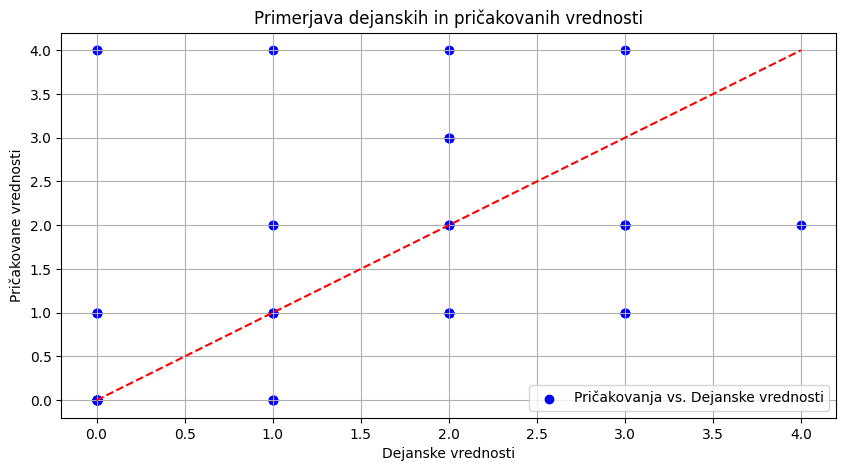

Natančnost of KNN: 0.45


In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd





plt.figure(figsize=(10, 5))
plt.scatter(x=y_test, y=gnb_pred, alpha=1, c='blue', label='Pričakovanja vs. Dejanske vrednosti')
plt.title('Primerjava dejanskih in pričakovanih vrednosti')
plt.xlabel('Dejanske vrednosti')
plt.ylabel('Pričakovane vrednosti')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


print("Natančnost of KNN:", accuracy_score(y_test, knn_pred))


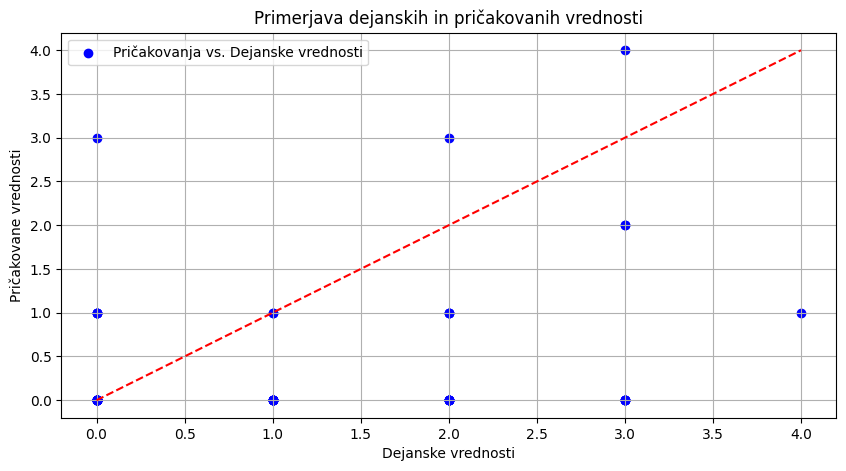

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

plt.figure(figsize=(10, 5))
plt.scatter(x=y_test, y=knn_pred, alpha=1, c='blue', label='Pričakovanja vs. Dejanske vrednosti')
plt.title('Primerjava dejanskih in pričakovanih vrednosti')
plt.xlabel('Dejanske vrednosti')
plt.ylabel('Pričakovane vrednosti')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


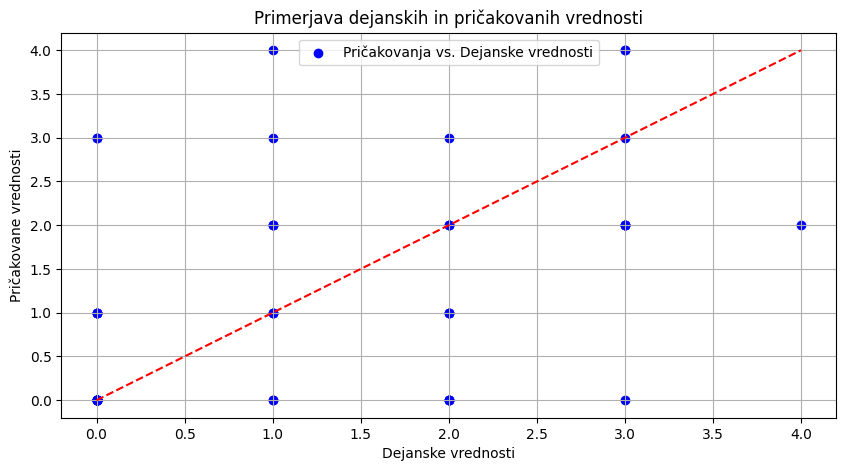

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

plt.figure(figsize=(10, 5))
plt.scatter(x=y_test, y=dtc_pred, alpha=1, c='blue', label='Pričakovanja vs. Dejanske vrednosti')
plt.title('Primerjava dejanskih in pričakovanih vrednosti')
plt.xlabel('Dejanske vrednosti')
plt.ylabel('Pričakovane vrednosti')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
all_results = pd.concat([bay_result, knn_result, dtc_result])
all_results.columns = ['Metoda', 'Natančnost', 'Preciznost', 'Recall', 'F1']


all_results.reset_index(drop=True)




,Metoda,Natančnost,Preciznost,Recall,F1
0,Gaussov Naivni Bayes,0.533333,0.549048,0.533333,0.538971
1,K najbližjih sosedov,0.45,0.311111,0.45,0.366667
2,Odlocitveno drevo,0.516667,0.513763,0.516667,0.513955
